Analisis de datos con Naïve Bayes

Procesamiento de datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Cargar dataset
df = pd.read_csv('/content/Netflix Datasets Evaluation MS Excel.csv')

# Seleccionar columnas
df = df[['show_id', 'type', 'title', 'director', 'country', 'date_added']]

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Crear una columna 'Success' basada en tipo (ejemplo)
df['Success'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Codificar si fuera necesario (aunque ya es binaria aquí)
# le = LabelEncoder()
# df['Success'] = le.fit_transform(df['Success'])

df.head()


,show_id,type,title,director,country,date_added,Success
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",1
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,"September 24, 2021",0
9,s10,Movie,The Starling,Theodore Melfi,United States,"September 24, 2021",1
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic","September 23, 2021",1


Analisis de exploratorio de datos (EDA)


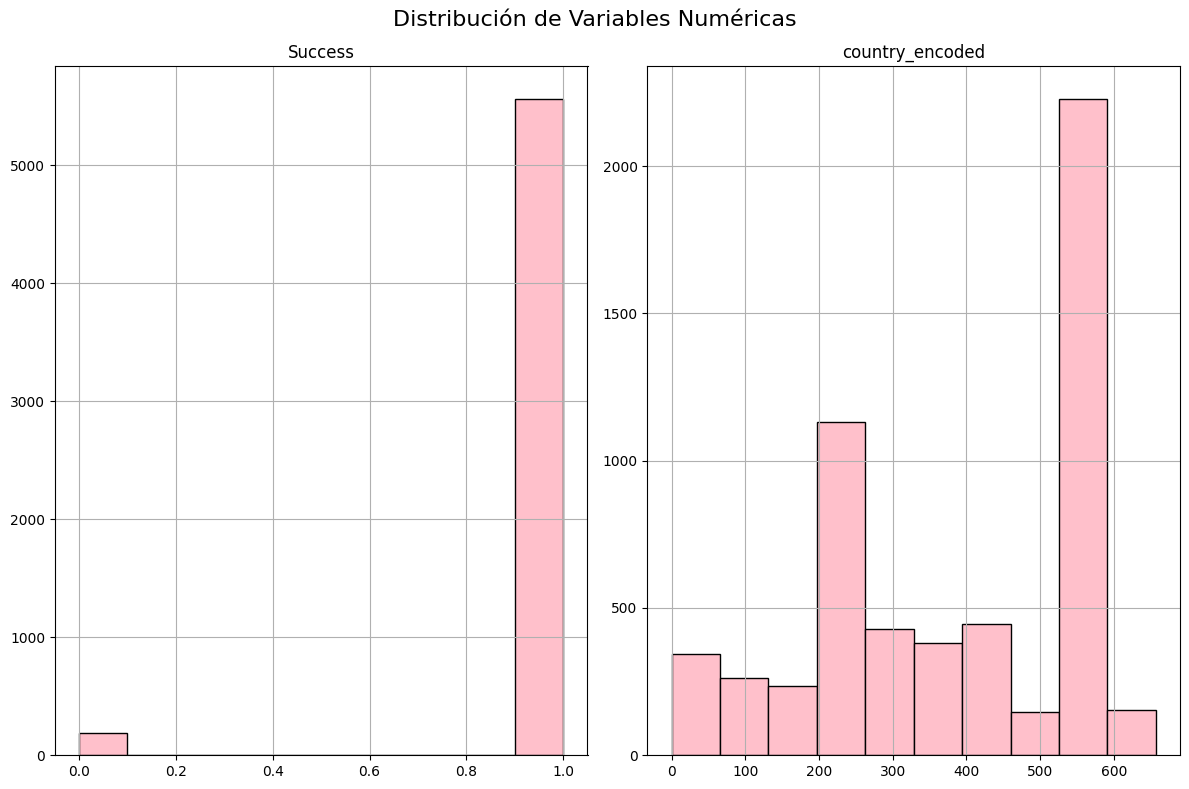

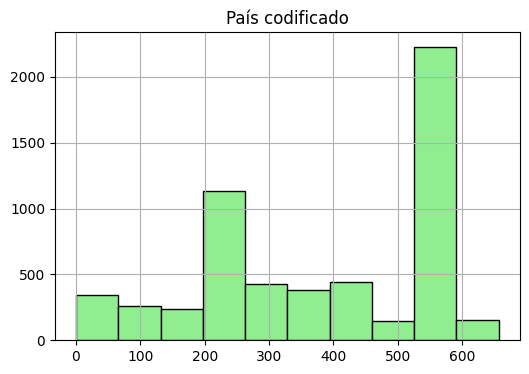

/tmp/ipython-input-11-2063286978.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


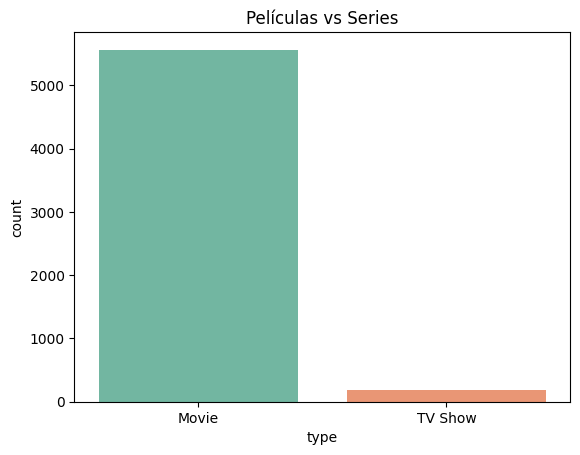

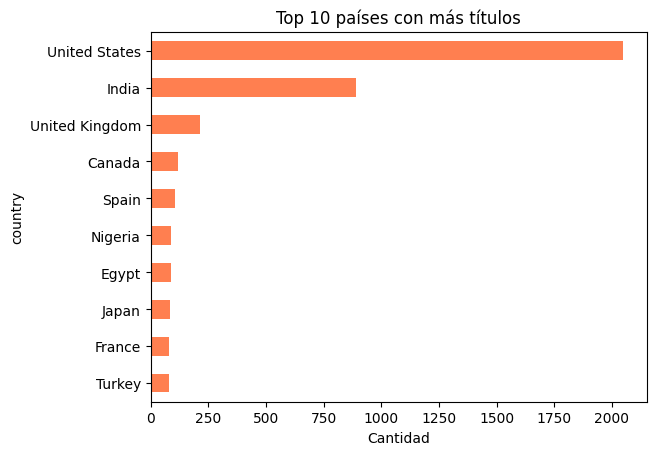

In [ ]:
import matplotlib.pyplot as plt  # ← Esto es lo que faltaba

# Graficar histogramas de variables numéricas
df.hist(figsize=(12, 8), color='pink', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

le = LabelEncoder()
df['country_encoded'] = le.fit_transform(df['country'])

# Ahora puedes graficar country_encoded
df.hist(column='country_encoded', figsize=(6, 4), color='lightgreen', edgecolor='black')
plt.title('País codificado')
plt.show()

import seaborn as sns

sns.countplot(data=df, x='type', palette='Set2')
plt.title('Películas vs Series')
plt.show()

df['country'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 países con más títulos')
plt.xlabel('Cantidad')
plt.gca().invert_yaxis()
plt.show()

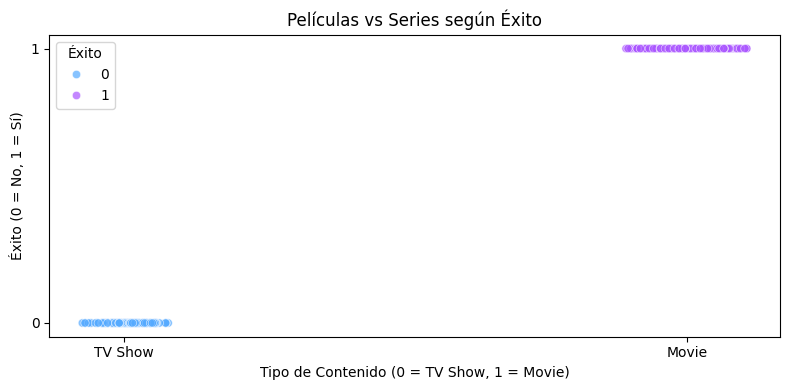

In [ ]:
# Convertir 'type' a valores numéricos para scatterplot
df['type_num'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Agregar un poco de ruido para separar los puntos (jitter)
df['jitter'] = np.random.normal(0, 0.03, size=len(df))

plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['type_num'] + df['jitter'], y=df['Success'], hue=df['Success'], palette='cool', alpha=0.7)

plt.title('Películas vs Series según Éxito')
plt.xlabel('Tipo de Contenido (0 = TV Show, 1 = Movie)')
plt.ylabel('Éxito (0 = No, 1 = Sí)')
plt.yticks([0, 1])
plt.xticks([0, 1], ['TV Show', 'Movie'])
plt.legend(title='Éxito')
plt.tight_layout()

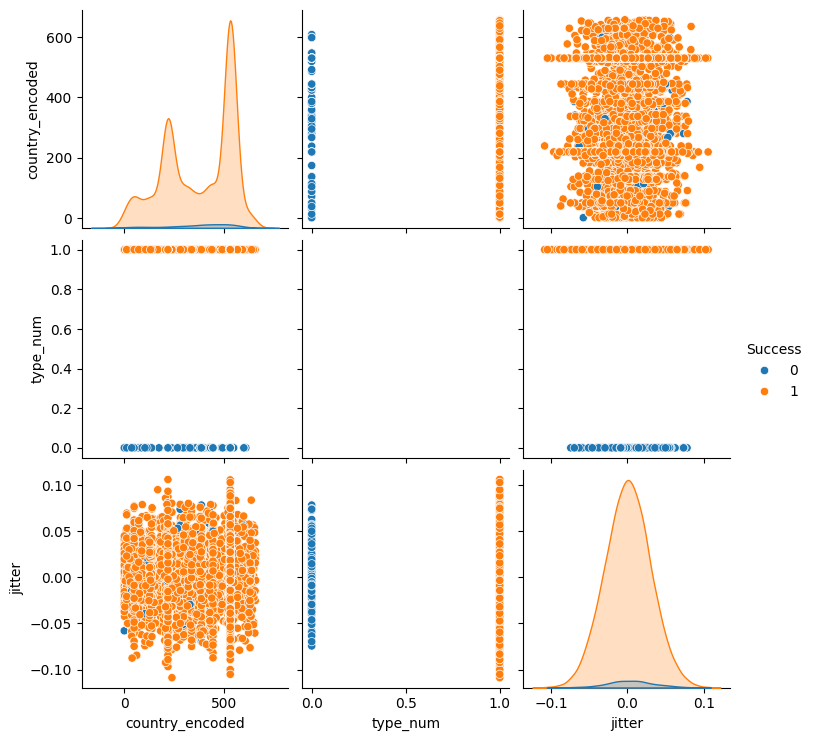

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue='Success')
plt.show()

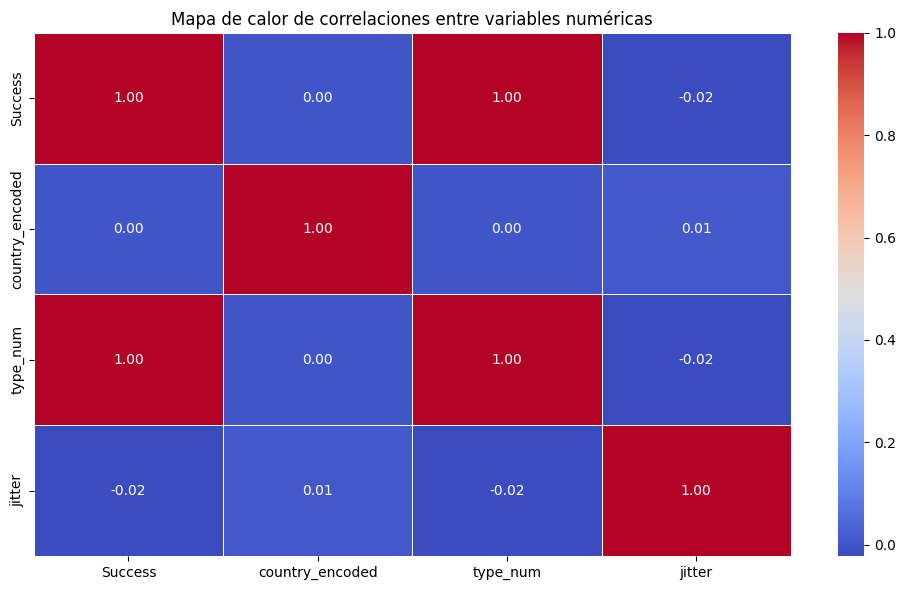

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas para correlación
df_numeric = df.select_dtypes(include=[np.number])

# Verificar que haya columnas numéricas suficientes
if df_numeric.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title('Mapa de calor de correlaciones entre variables numéricas')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No hay suficientes columnas numéricas para generar un mapa de calor.")

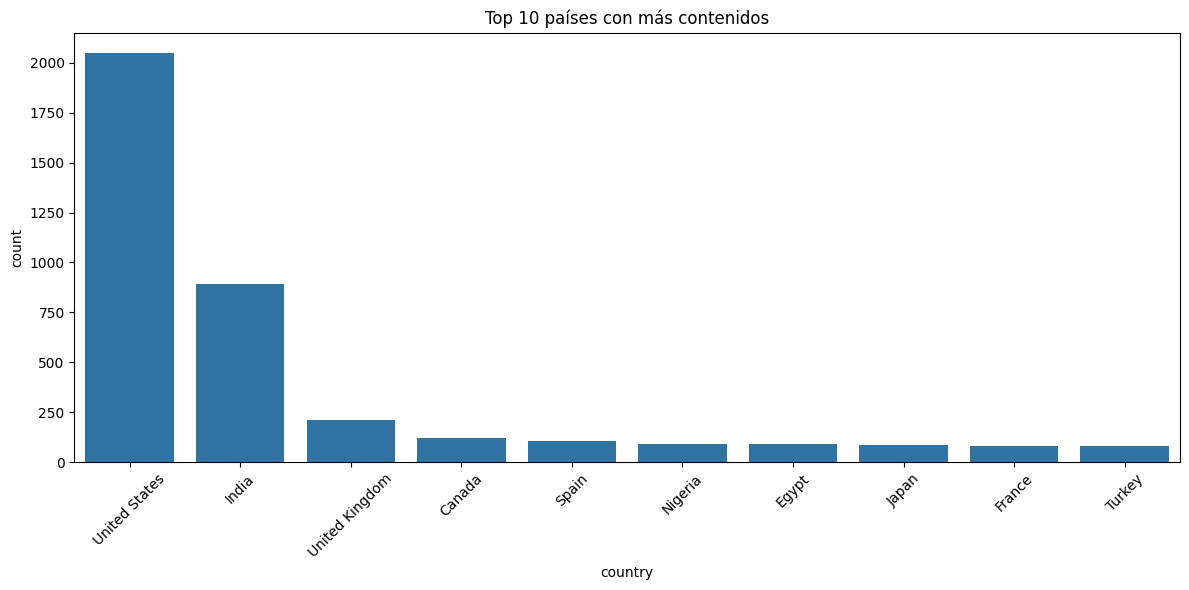

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index[:10])
plt.title('Top 10 países con más contenidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analisis de datos

Revision estadistica de las variables e identificacion de posibles insights


In [ ]:
df.describe()

,Success,country_encoded,type_num,jitter
count,5751.000000,5751.000000,5751.000000,5751.000000
mean,0.967136,371.873587,0.967136,0.000461
std,0.178296,171.975857,0.178296,0.030031
min,0.000000,0.000000,0.000000,-0.108648
25%,1.000000,219.000000,1.000000,-0.019593
50%,1.000000,428.000000,1.000000,0.000502
75%,1.000000,530.000000,1.000000,0.020536
max,1.000000,657.000000,1.000000,0.105891


/tmp/ipython-input-55-2304315886.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='country', y='Success Rate', palette='cool')


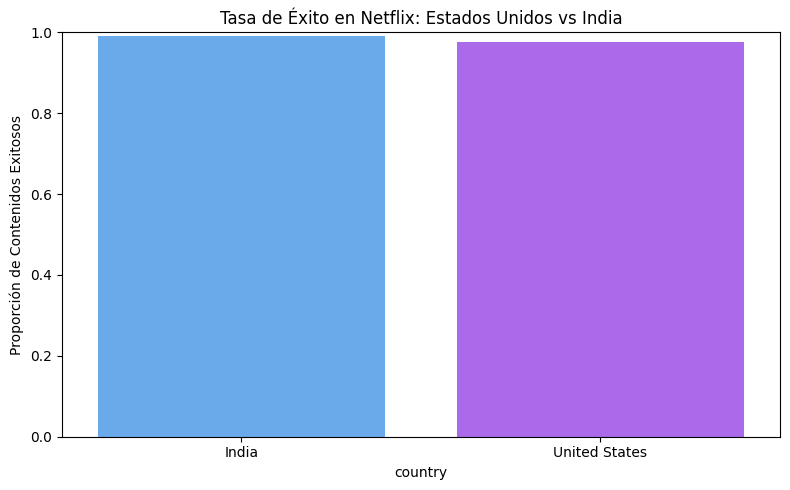

In [ ]:
# Filtrar datos solo de Estados Unidos e India
df_filtered = df[df['country'].isin(['United States', 'India'])].dropna(subset=['Success'])

# Asegurar que 'Success' es numérica (0 = No, 1 = Sí)
if df_filtered['Success'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df_filtered['Success'] = le.fit_transform(df_filtered['Success'])

# Calcular proporción de éxito por país
success_rate = df_filtered.groupby('country')['Success'].mean().reset_index()
success_rate.columns = ['country', 'Success Rate']

# Visualizar
plt.figure(figsize=(8, 5))
sns.barplot(data=success_rate, x='country', y='Success Rate', palette='cool')
plt.title('Tasa de Éxito en Netflix: Estados Unidos vs India')
plt.ylabel('Proporción de Contenidos Exitosos')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# Eliminar columnas no numéricas si existen
X = df.select_dtypes(include=['int64', 'float64']).drop('Success', axis=1)
y = df['Success']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Prediccion y evaluacion del modelo

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Matriz de Confusión:
 [[  37    0]
 [   0 1114]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00      1114

    accuracy                           1.00      1151
   macro avg       1.00      1.00      1.00      1151
weighted avg       1.00      1.00      1.00      1151



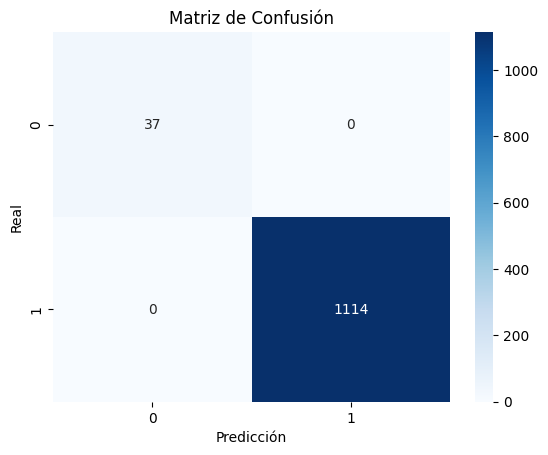

In [ ]:
# Visualización de la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

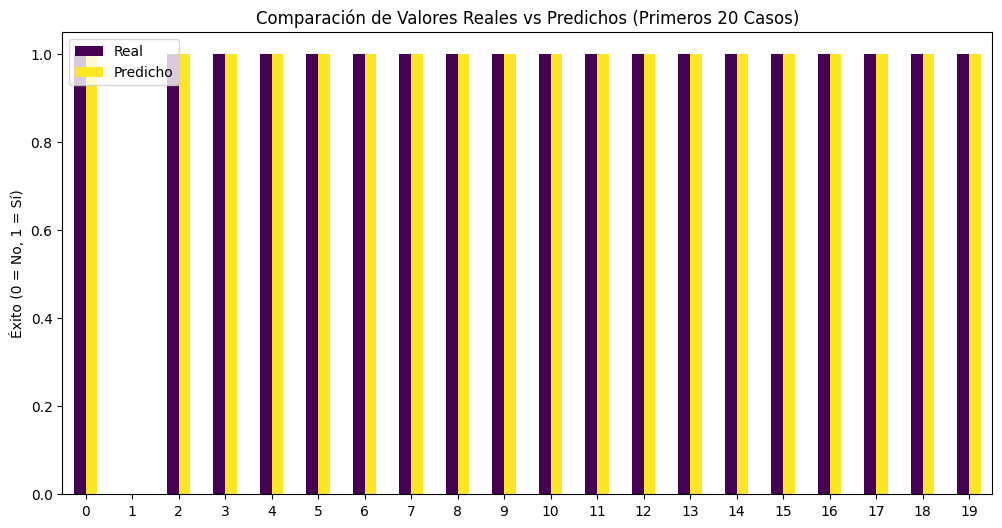

In [ ]:
# Comparación real vs predicho
comparison_df = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
comparison_df.reset_index(drop=True).head(20).plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.title('Comparación de Valores Reales vs Predichos (Primeros 20 Casos)')
plt.ylabel('Éxito (0 = No, 1 = Sí)')
plt.xticks(rotation=0)
plt.show()